In [1]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
from sklearn.model_selection import train_test_split
import warnings
import requests
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score


In [2]:
# importing and reading the csv raw data
loan_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv', index_col=False)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan_df.shape

(614, 13)

In [4]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_df = loan_df.dropna()

In [8]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
loan_df.shape

(480, 13)

In [10]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
loan_df['Loan_Status']= label.fit_transform(loan_df['Loan_Status'])

In [11]:
loan_df['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int32

In [12]:
loan_df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
loan_df = loan_df.replace(to_replace= '3+',value =4)


In [14]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


In [15]:
loan_df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':0,'Female':1},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':2,'Semiurban':1,'Urban':0},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

* Mapping of parameteres with values for better performance
- For Married:'No':0,'Yes':1 
- For 'Gender':'Male':0,'Female':1
- For 'Self_Employed':'No':0,'Yes':1
- For 'Property_Area':'Rural':2,'Semiurban':1,'Urban':0
- For 'Education':'Graduate':1,'Not Graduate':0

In [16]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


* Spliting the dataset in Train and Test

In [17]:
A = loan_df.drop(columns=['Loan_ID','Loan_Status'],axis =1)
B= loan_df['Loan_Status']

In [18]:
A

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,2
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,2
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,0
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,0


In [19]:
B

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int32

In [20]:
A_train, A_test,B_train,B_test = train_test_split(A,B,test_size=0.1,random_state=2)

In [21]:
print(A_train.shape,A_test.shape,A.shape)

(432, 11) (48, 11) (480, 11)


In [22]:
print(B_train.shape,B_test.shape,B.shape)

(432,) (48,) (480,)


#### SVM classifier

In [23]:
from sklearn.svm import SVC
model = SVC(random_state=20)

In [24]:
model.fit(A_train,B_train)

SVC(random_state=20)

In [25]:
A_train_prediction = model.predict(A_train)


In [26]:
print(A_train_prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [27]:
A_test_prediction = model.predict(A_test)


In [28]:
print(A_test_prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [29]:
len(A_test_prediction)

48

In [30]:
len(B_test)

48

In [31]:
len(A_train_prediction)

432

In [32]:
test_loan_accuracy = accuracy_score(B_test, A_test_prediction)
print('Accuracy score of SVM test data : ', test_loan_accuracy)

Accuracy score of SVM test data :  0.6875


In [33]:
train_loan_accuracy = accuracy_score(B_train, A_train_prediction)
print('Accuracy score of SVM train data : ', train_loan_accuracy)

Accuracy score of SVM train data :  0.7013888888888888


##### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier


In [35]:
rd_loan = RandomForestClassifier(n_estimators=100)



In [36]:
rd_loan.fit(A_train,B_train)


RandomForestClassifier()

In [37]:
random_train_prediction = rd_loan.predict(A_train)

In [38]:
print(random_train_prediction)

[1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1]


In [39]:
random_test_prediction = rd_loan.predict(A_test)

In [40]:
print(random_test_prediction)

[1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0]


In [41]:
test_random_accuracy = accuracy_score(B_test, random_test_prediction)
print('Accuracy score of Random forest classifier test data : ', test_random_accuracy)

Accuracy score of Random forest classifier test data :  0.8541666666666666


In [42]:
train_random_accuracy = accuracy_score(B_train, random_train_prediction)
print('Accuracy score of Random forest classifier train data : ', train_random_accuracy)

Accuracy score of Random forest classifier train data :  1.0


##### DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier



In [44]:
dt = DecisionTreeClassifier()
dt.fit(A_train,B_train)

DecisionTreeClassifier()

In [45]:
dt_train_prediction = dt.predict(A_train)

In [46]:
print(dt_train_prediction)

[1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1]


In [47]:
dt_test_prediction = dt.predict(A_test)

In [48]:
print(dt_test_prediction)

[1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 0 1 1 0]


In [49]:
test_dt_accuracy = accuracy_score(B_test, dt_test_prediction)
print('Accuracy score of Decision tree classifier test data : ', test_dt_accuracy)

Accuracy score of Decision tree classifier test data :  0.75


In [50]:
train_dt_accuracy = accuracy_score(B_train, dt_train_prediction)
print('Accuracy score of  Decision tree  classifier train data : ', train_dt_accuracy)

Accuracy score of  Decision tree  classifier train data :  1.0


##### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB



In [52]:
nb = GaussianNB()
nb.fit(A_train,B_train)

GaussianNB()

In [53]:
nb_train_prediction = nb.predict(A_train)

In [54]:
print(nb_train_prediction)

[1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [55]:
nb_test_prediction = nb.predict(A_test)

In [56]:
print(nb_test_prediction)

[1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 0]


In [57]:
test_nb_accuracy = accuracy_score(B_test, nb_test_prediction)
print('Accuracy score of Naive bayes classifier test data : ', test_nb_accuracy)

Accuracy score of Naive bayes classifier test data :  0.8125


In [58]:
train_nb_accuracy = accuracy_score(B_train, nb_train_prediction)
print('Accuracy score of Naive bayes classifier test data : ', train_nb_accuracy)

Accuracy score of Naive bayes classifier test data :  0.7916666666666666


##### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr = LogisticRegression()
lr.fit(A_train,B_train)

LogisticRegression()

In [61]:
lr_train_prediction = lr.predict(A_train)

In [62]:
print(lr_train_prediction)

[1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [63]:
lr_test_prediction = lr.predict(A_test)

In [64]:
print(lr_test_prediction)

[1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0]


In [65]:
test_lr_accuracy = accuracy_score(B_test, lr_test_prediction)
print('Accuracy score of Logistic Regression classifier test data : ', test_lr_accuracy)

Accuracy score of Logistic Regression classifier test data :  0.8333333333333334


In [66]:
train_lr_accuracy = accuracy_score(B_train, lr_train_prediction)
print('Accuracy score of Logistic Regression classifier train data : ', train_lr_accuracy)

Accuracy score of Logistic Regression classifier train data :  0.8125


* From  all the classifications we can conclude that Logistic Regression classifier performs best on the validation data with an accuracy score of 83.3%

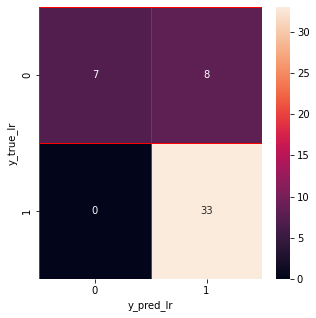

In [67]:
from sklearn.metrics import confusion_matrix
# Linear Regression
y_pred_lr = lr.predict(A_test)
y_true_lr = B_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()
